### Investigate 15710 null assessment_item_response_id

In [6]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
filterDf = load_df('filterDf')

###### Create Dataframe of null observations

In [3]:
nullDf = filterDf.filter( F.col('assessment_item_response_id').isNull() )

nullDf.count()

15710

- 15,710 null observations

###### Display distinct values

In [4]:
distinct_val(nullDf)

,0
assessment_item_response_id (ia),NaN
assignment_attempt_number (aa),1
assignment_max_attempts (a),1
is_manual_scoring_required (aa),False


- assignment_attempt_number = 1
- assignment_max_attempts = 1
- is_manual_scoring_required = False

###### Compare dates with full sample

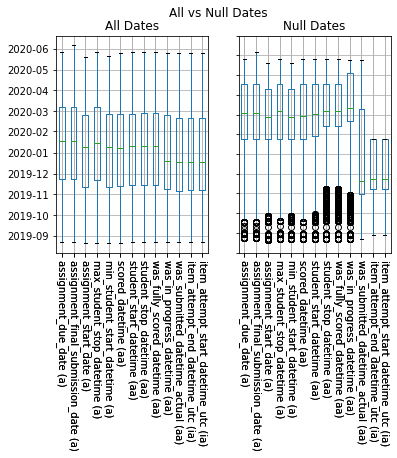

In [7]:
dual_date_boxplot(
    get_random_sample(filterDf),
    nullDf,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

- Median shifted from 1/15 to 3/1
  - All assessment (a)
  - All assessment attempt (aa)
    - except was_submitted_datetime_actual
- Median shifted from 12/15 to 11/15
  - All item attempt (ia)
  - was_submitted_datetime_actual

##### Are observations correlated with final_score_unweighted has 16,582 zero values

In [3]:
nullDf.filter(F.col('final_score_unweighted') == 0).count()

13715

- 13715 observations related
- Ignore those observations


##### Observations with final_score_unweighted > 0

In [4]:
nullDf = nullDf.filter(F.col('final_score_unweighted') > 0)
nullDf.count()

1995

- 1,995 observations


###### Categorical / Nominal Correlations Heatmap

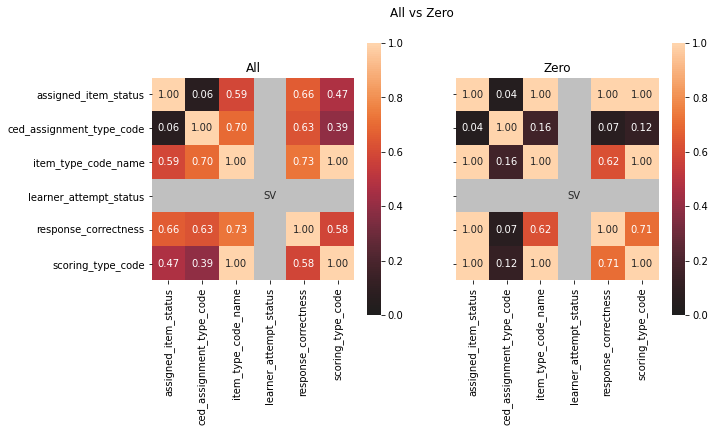

In [7]:
types = get_var_types()

dual_assoc_heatmap(
    get_random_sample(filterDf).select(*types['nominalVars']),
    nullDf.select(*types['nominalVars']),
    'All',
    'Zero',
    'All vs Zero'
)

- New Strong Correlations
  - assigned_item_status & item_type_code_name
    - investigate further
  - assigned_item_status & response_correctness
    - response_correctness is not accurate
  - assigned_item_status & scoring_type_code
    - investigate further

###### Crostabulation of assigned_item_status & item_type_code_name

In [8]:
pdDf = nullDf.select('assigned_item_status', 'item_type_code_name').toPandas()
pd.crosstab(pdDf.assigned_item_status, pdDf.item_type_code_name)

item_type_code_name,bucketing,choiceMatrix,cloze,equationEntry,essay,fileUpload,fillInTheBlank,graphing,imageLabel,matching,multipleChoice,multipleSelect,numberLine,selectText,shortAnswer,sortable,trueFalse
assigned_item_status,,,,,,,,,,,,,,,,,
offline_scored,12,8,51,403,32,4,59,77,7,16,465,30,5,10,13,10,20


- Only contains assigned_item_status = offline_scored

###### Crostabulation of assigned_item_status & scoring_type_code

In [9]:
pdDf = nullDf.select('assigned_item_status', 'scoring_type_code').toPandas()
pd.crosstab(pdDf.assigned_item_status, pdDf.scoring_type_code)

scoring_type_code,[unassigned],automatic,manual
assigned_item_status,,,
assigned,773,0,0
offline_scored,0,1173,49


- Correlations
  -  assigned_item_status = assigned & scoring_type_code = unassigned
  - assigned_item_status = offline_scored & scoring_type_code = automatic or manual
    - offline_scored means manual scored but 1173 indicates scoring_type_code automatic

###### Binary Correlations Heatmap

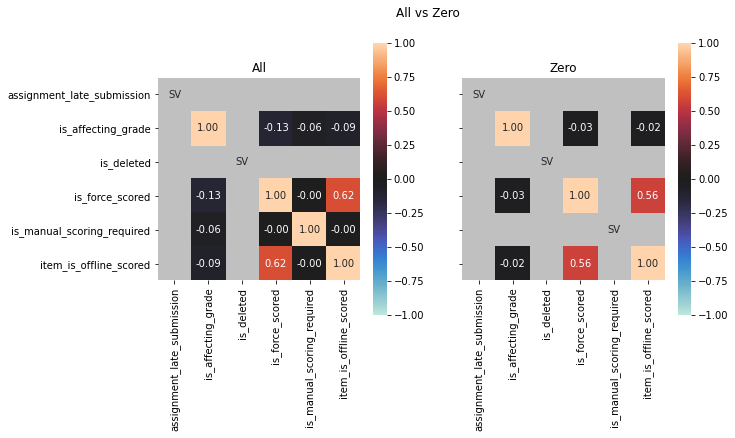

In [10]:
dual_assoc_heatmap(
    get_random_sample(filterDf).select(*types['binaryVars']),
    nullDf.select(*types['binaryVars']),
    'All',
    'Zero',
    'All vs Zero'
)

- No new correlations

##### Conclusion
- No patern found in the remaining 1,995 observations
- Appear to be random questions not answered by learners
- No further action needed

In [11]:
finish_todo('Investigate 15710 null assessment_item_response_id')